In [1]:
#Importing the libraries
import pandas as pd #For calculation
import matplotlib.pyplot as plt #For ploting the graph
import seaborn as sns   #For ploting the graph
from statsmodels.graphics.regressionplots import influence_plot  #For calculating cook's distance,etc
import statsmodels.formula.api as smf #For building the regression equation
import numpy as np #For general analysis

In [2]:
df = pd.read_csv('50_Startups.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df= df.rename({'R&D Spend':'DevCost', 'Marketing Spend':'MarCost'}, axis=1)
df

,DevCost,Administration,MarCost,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DevCost         50 non-null     float64
 1   Administration  50 non-null     float64
 2   MarCost         50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
#Checking For Missing vaues
df.isna().sum()

DevCost           0
Administration    0
MarCost           0
State             0
Profit            0
dtype: int64

In [7]:
#Correlation
df.corr()

,DevCost,Administration,MarCost,Profit
DevCost,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MarCost,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


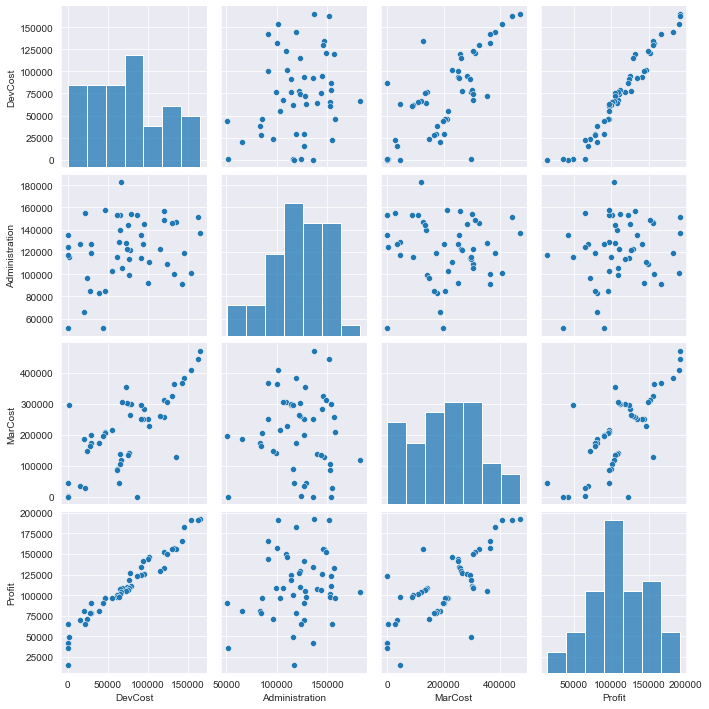

In [8]:
sns.set_style(style='darkgrid')
sns.pairplot(df);

In [9]:
# Building model
#DevCost	Administration	MarCost
model = smf.ols('Profit~DevCost+Administration+MarCost',data=df).fit()

In [10]:
#Coefficients
model.params

Intercept         50122.192990
DevCost               0.805715
Administration       -0.026816
MarCost               0.027228
dtype: float64

In [11]:
# t and p values

model.tvalues, model.pvalues

(Intercept          7.626218
 DevCost           17.846374
 Administration    -0.525507
 MarCost            1.655077
 dtype: float64,
 Intercept         1.057379e-09
 DevCost           2.634968e-22
 Administration    6.017551e-01
 MarCost           1.047168e-01
 dtype: float64)

In [12]:
model.rsquared, model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [13]:
# generating t and p values for individual variables
ml_ad= smf.ols('Profit~Administration',data=df).fit()
ml_ad.tvalues, ml_ad.pvalues

(Intercept         3.040044
 Administration    1.419493
 dtype: float64,
 Intercept         0.003824
 Administration    0.162217
 dtype: float64)

In [14]:
#We can see that MArketing Cost is a significant value
ml_mk= smf.ols('Profit~MarCost',data=df).fit()
ml_mk.tvalues, ml_mk.pvalues

(Intercept    7.808356
 MarCost      7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MarCost      4.381073e-10
 dtype: float64)

In [15]:

rsq_dev = smf.ols('DevCost~Administration+MarCost',data=df).fit().rsquared
vif_dev = 1/(1-rsq_dev)

rsq_ad = smf.ols('Administration~MarCost+DevCost',data=df).fit().rsquared
vif_ad = 1/(1-rsq_ad)

rsq_mk = smf.ols('MarCost~DevCost+Administration',data=df).fit().rsquared
vif_mk = 1/(1-rsq_mk)

#Storing VIF values in dataframe
d1= {'Variables':['DevCost','Administration','MarCost'], 'VIF':[vif_dev,vif_ad,vif_mk]}
vif_frame = pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,DevCost,2.468903
1,Administration,1.175091
2,MarCost,2.326773


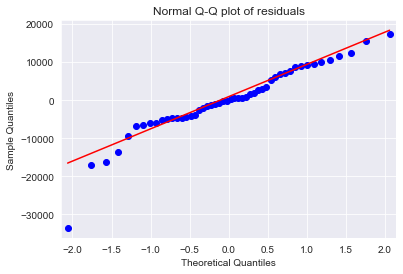

In [16]:
import statsmodels.api as sm
qqplot =sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [17]:
list(np.where(model.resid<(-20000)))

[array([49], dtype=int64)]

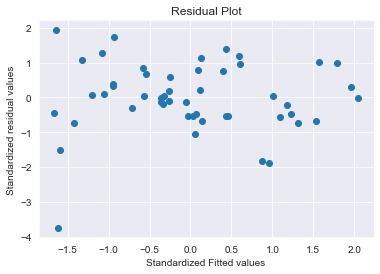

In [18]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

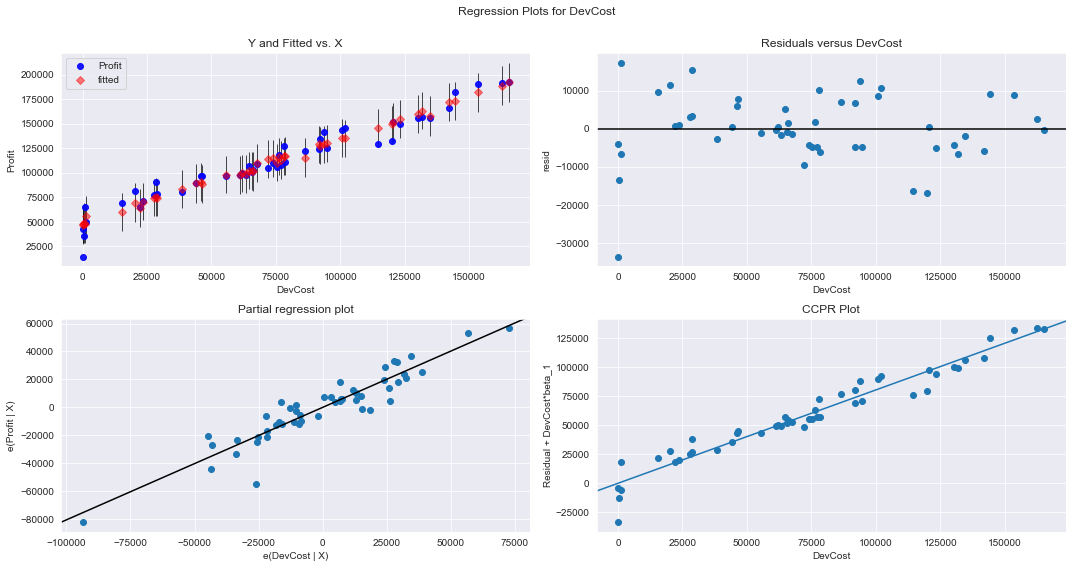

In [19]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "DevCost", fig=fig)
plt.show()

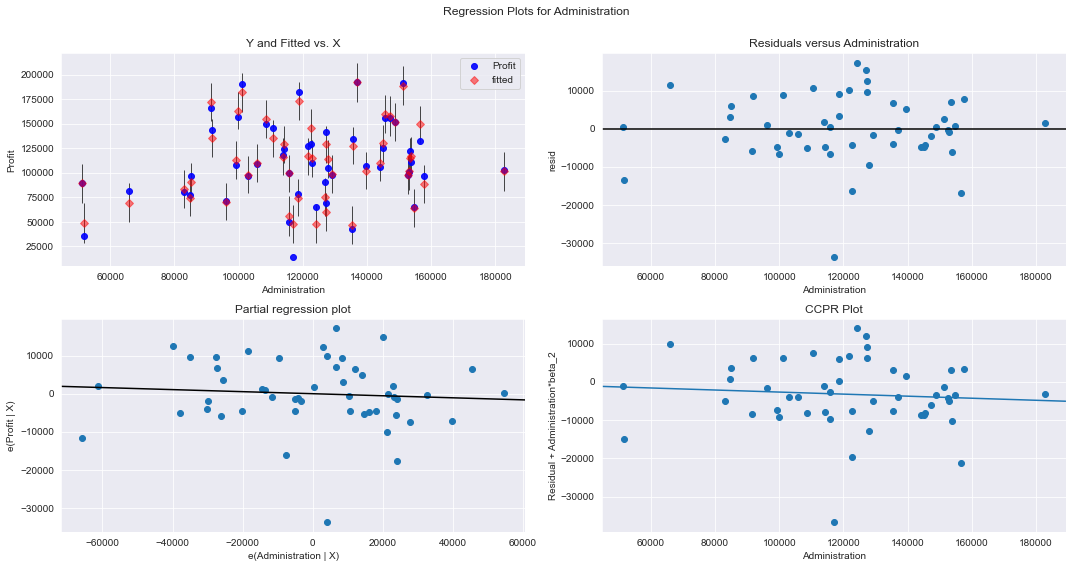

In [20]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

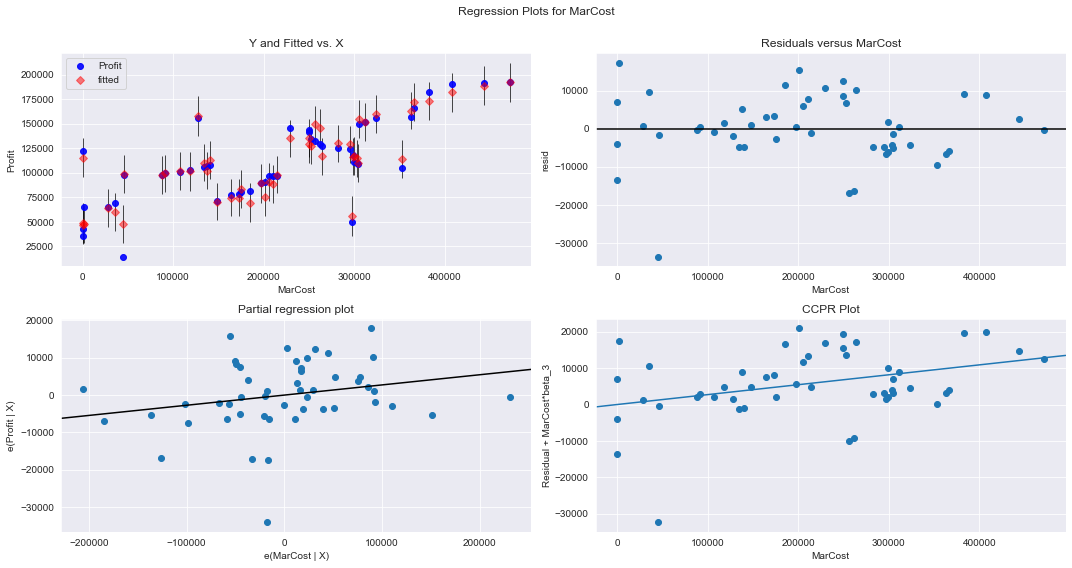

In [21]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MarCost", fig=fig)
plt.show()

In [22]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

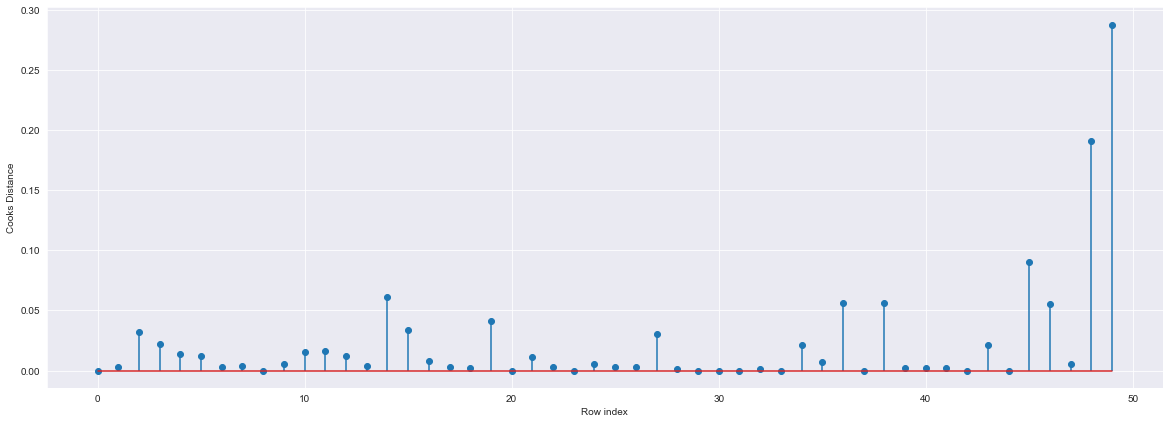

In [23]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [24]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543267)

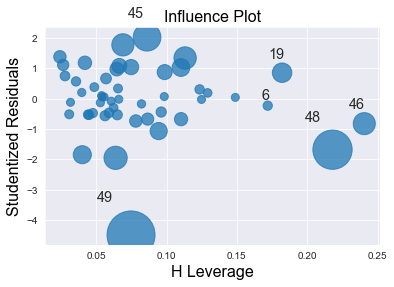

In [25]:
influence_plot(model)
plt.show()

In [26]:
    k = df.shape[1] #Number of Columns/variables
    n = df.shape[0] #Number of Rows/datapoints
    leverage_cutoff = 3*((k + 1)/n)

In [27]:
leverage_cutoff

0.36

In [28]:
df[df.index.isin([49])]

,DevCost,Administration,MarCost,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [29]:
df.head()

,DevCost,Administration,MarCost,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Improving the model

In [30]:
#Deleting the outliers
df_new= df.drop(df.index[[49]],axis=0).reset_index(drop=True)
df_new.head()

,DevCost,Administration,MarCost,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


#  Model Deletion Diagnostic and Final Model

In [31]:
 model2=smf.ols("Profit~DevCost+Administration+MarCost",data=df_new).fit()

In [32]:
model2.rsquared, model2.rsquared_adj

(0.9613162435129847, 0.9587373264138503)

In [35]:
while model2.rsquared < 0.99:
    for c in [np.max(c)>1]:
        model2=smf.ols("Profit~DevCost+Administration+MarCost",data=df_new).fit()
        (c,_)=model2.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        df_new=df_new.drop(df_new.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        df_new
    else:
        final_model=smf.ols("Profit~DevCost+Administration+MarCost",data=df_new).fit()
        final_model.rsquared , final_model.aic
       

In [36]:
final_model.rsquared

0.9882757054424702

In [37]:
df_new

,DevCost,Administration,MarCost,State,Profit
0,142107.34,91391.77,366168.42,Florida,166187.94
1,131876.90,99814.71,362861.36,New York,156991.12
2,130298.13,145530.06,323876.68,Florida,155752.60
3,120542.52,148718.95,311613.29,New York,152211.77
4,123334.88,108679.17,304981.62,California,149759.96
5,91992.39,135495.07,252664.93,California,134307.35
6,94657.16,145077.58,282574.31,New York,125370.37
7,91749.16,114175.79,294919.57,Florida,124266.90
8,76253.86,113867.30,298664.47,California,118474.03
9,67532.53,105751.03,304768.73,Florida,108733.99


# Model Predictions

In [38]:
new_data= pd.DataFrame({'DevCost': 80000, 'Administration':100000 ,'MarCost':125000}, index=[0])
new_data

,DevCost,Administration,MarCost
0,80000,100000,125000


In [39]:
final_model.predict(new_data)

0    111343.54032
dtype: float64

In [40]:
pred_y = final_model.predict(df_new)
pred_y

0     165589.539700
1     158552.826483
2     156789.000710
3     149524.698853
4     150122.356712
5     126598.769555
6     130104.785747
7     127878.387928
8     117298.757074
9     111329.242429
10    110009.916133
11    102331.717613
12    109661.804131
13    103462.767086
14    101874.612012
15     97655.794577
16     97872.919535
17     96858.382686
18     98654.449007
19     93583.600868
20     91186.568204
21     88571.938968
22     84521.312916
23     78528.002935
24     76670.262623
25     73237.524757
26     68075.710756
dtype: float64

# Table containing R^2 value for each prepared model


In [41]:
d2={
    'Prep_Models':['Model','Final_Model'],
    'Rsquared':[model.rsquared,final_model.rsquared]
}

table= pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.988276
